<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


In [2]:
def load_quickdraw10(path):
  data = np.load(path)
  X = data['arr_0']
  y = data['arr_1']
  X, y = shuffle(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                      random_state=42)
  
  return X_train, y_train, X_test, y_test

In [3]:
X_train, y_train, X_test, y_test = load_quickdraw10('../quickdraw10.npz')

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

In [5]:
##### Your Code Here #####

def create_model(lr, optimizer = Adam):
  optim = optimizer(learning_rate=lr)

  model = Sequential(
      [Dense(64, activation='relu', input_dim=784),
       Dense(32, activation='relu'),
       Dense(10, activation='softmax')]
  )

  model.compile(optimizer=optim, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])  
  return model

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [6]:
model_one = create_model(.01)
bt_default = model_one.fit(X_train, y_train,
                       epochs=10,
                       batch_size=32,
                       validation_data=(X_test, y_test))

Epoch 1/10
2500/2500 [==============================] - 2s 617us/step - loss: 2.3392 - accuracy: 0.3196 - val_loss: 1.4606 - val_accuracy: 0.4465
Epoch 2/10
2500/2500 [==============================] - 1s 576us/step - loss: 1.4535 - accuracy: 0.4571 - val_loss: 1.4248 - val_accuracy: 0.4658
Epoch 3/10
2500/2500 [==============================] - 1s 577us/step - loss: 1.6253 - accuracy: 0.3872 - val_loss: 1.5978 - val_accuracy: 0.4012
Epoch 4/10
2500/2500 [==============================] - 1s 580us/step - loss: 1.6194 - accuracy: 0.3830 - val_loss: 1.7423 - val_accuracy: 0.3458
Epoch 5/10
2500/2500 [==============================] - 1s 576us/step - loss: 1.8299 - accuracy: 0.3079 - val_loss: 1.9251 - val_accuracy: 0.2440
Epoch 6/10
2500/2500 [==============================] - 1s 573us/step - loss: 1.9486 - accuracy: 0.2107 - val_loss: 1.9791 - val_accuracy: 0.1890
Epoch 7/10
2500/2500 [==============================] - 1s 572us/step - loss: 1.9822 - accuracy: 0.1886 - val_loss: 2.0202 -

In [7]:
model_two = create_model(.01)
bt_default = model_two.fit(X_train, y_train,
                       epochs=20,
                       batch_size=64,
                       validation_data=(X_test, y_test))

Epoch 1/20
1250/1250 [==============================] - 1s 706us/step - loss: 2.5431 - accuracy: 0.2223 - val_loss: 1.9375 - val_accuracy: 0.2634
Epoch 2/20
1250/1250 [==============================] - 1s 644us/step - loss: 1.8812 - accuracy: 0.2646 - val_loss: 1.8585 - val_accuracy: 0.2663
Epoch 3/20
1250/1250 [==============================] - 1s 644us/step - loss: 1.8543 - accuracy: 0.2706 - val_loss: 1.8693 - val_accuracy: 0.2686
Epoch 4/20
1250/1250 [==============================] - 1s 642us/step - loss: 1.9960 - accuracy: 0.2304 - val_loss: 2.0020 - val_accuracy: 0.2476
Epoch 5/20
1250/1250 [==============================] - 1s 650us/step - loss: 1.8877 - accuracy: 0.2601 - val_loss: 1.9031 - val_accuracy: 0.2821
Epoch 6/20
1250/1250 [==============================] - 1s 647us/step - loss: 1.8414 - accuracy: 0.2826 - val_loss: 1.8267 - val_accuracy: 0.2898
Epoch 7/20
1250/1250 [==============================] - 1s 653us/step - loss: 1.7737 - accuracy: 0.3231 - val_loss: 1.7732 -

In [8]:
model_three = create_model(.01)
bt_default = model_three.fit(X_train, y_train,
                       epochs=10,
                       batch_size=8,
                       validation_data=(X_test, y_test))

Epoch 1/10
10000/10000 [==============================] - 5s 491us/step - loss: 2.4203 - accuracy: 0.1010 - val_loss: 2.3046 - val_accuracy: 0.0983
Epoch 2/10
10000/10000 [==============================] - 5s 484us/step - loss: 2.3059 - accuracy: 0.0986 - val_loss: 2.3062 - val_accuracy: 0.0983
Epoch 3/10
10000/10000 [==============================] - 5s 482us/step - loss: 2.3053 - accuracy: 0.0989 - val_loss: 2.3051 - val_accuracy: 0.0997
Epoch 4/10
10000/10000 [==============================] - 5s 487us/step - loss: 2.3052 - accuracy: 0.1002 - val_loss: 2.3068 - val_accuracy: 0.0987
Epoch 5/10
10000/10000 [==============================] - 5s 488us/step - loss: 2.3053 - accuracy: 0.0994 - val_loss: 2.3038 - val_accuracy: 0.0997
Epoch 6/10
10000/10000 [==============================] - 5s 487us/step - loss: 2.3053 - accuracy: 0.0988 - val_loss: 2.3047 - val_accuracy: 0.0997
Epoch 7/10
10000/10000 [==============================] - 5s 490us/step - loss: 2.3053 - accuracy: 0.0998 - val_

In [9]:
model_four = create_model(.001)
bt_default = model_four.fit(X_train, y_train,
                       epochs=20,
                       batch_size=16,
                       validation_data=(X_test, y_test))

Epoch 1/20
5000/5000 [==============================] - 3s 553us/step - loss: 1.8547 - accuracy: 0.6398 - val_loss: 0.9108 - val_accuracy: 0.7384
Epoch 2/20
5000/5000 [==============================] - 3s 523us/step - loss: 0.8454 - accuracy: 0.7497 - val_loss: 0.8028 - val_accuracy: 0.7696
Epoch 3/20
5000/5000 [==============================] - 3s 526us/step - loss: 0.7539 - accuracy: 0.7762 - val_loss: 0.7888 - val_accuracy: 0.7695
Epoch 4/20
5000/5000 [==============================] - 3s 529us/step - loss: 0.7061 - accuracy: 0.7909 - val_loss: 0.7516 - val_accuracy: 0.7879
Epoch 5/20
5000/5000 [==============================] - 3s 524us/step - loss: 0.6823 - accuracy: 0.7963 - val_loss: 0.7000 - val_accuracy: 0.7940
Epoch 6/20
5000/5000 [==============================] - 3s 520us/step - loss: 0.6549 - accuracy: 0.8056 - val_loss: 0.6985 - val_accuracy: 0.7959
Epoch 7/20
5000/5000 [==============================] - 3s 519us/step - loss: 0.6417 - accuracy: 0.8097 - val_loss: 0.7065 -

In [10]:
model_five = create_model(.001)
bt_default = model_five.fit(X_train, y_train,
                       epochs=20,
                       batch_size=12,
                       validation_data=(X_test, y_test))

Epoch 1/20
6667/6667 [==============================] - 4s 533us/step - loss: 1.8411 - accuracy: 0.4744 - val_loss: 1.0971 - val_accuracy: 0.6474
Epoch 2/20
6667/6667 [==============================] - 4s 535us/step - loss: 0.9337 - accuracy: 0.7176 - val_loss: 0.8495 - val_accuracy: 0.7501
Epoch 3/20
6667/6667 [==============================] - 4s 532us/step - loss: 0.7988 - accuracy: 0.7648 - val_loss: 0.8040 - val_accuracy: 0.7711
Epoch 4/20
6667/6667 [==============================] - 4s 534us/step - loss: 0.7444 - accuracy: 0.7815 - val_loss: 0.7997 - val_accuracy: 0.7573
Epoch 5/20
6667/6667 [==============================] - 4s 539us/step - loss: 0.7041 - accuracy: 0.7936 - val_loss: 0.7290 - val_accuracy: 0.7904
Epoch 6/20
6667/6667 [==============================] - 4s 542us/step - loss: 0.6785 - accuracy: 0.8026 - val_loss: 0.7713 - val_accuracy: 0.7810
Epoch 7/20
6667/6667 [==============================] - 4s 533us/step - loss: 0.6582 - accuracy: 0.8091 - val_loss: 0.7456 -

In [20]:
model_six = create_model(.0001)
bt_default_32 = model_six.fit(X_train, y_train,
                       epochs=20,
                       batch_size=32,
                       validation_data=(X_test, y_test))

Epoch 1/20
2500/2500 [==============================] - 2s 626us/step - loss: 6.9541 - accuracy: 0.2117 - val_loss: 2.1192 - val_accuracy: 0.2248
Epoch 2/20
2500/2500 [==============================] - 2s 600us/step - loss: 1.9837 - accuracy: 0.2726 - val_loss: 1.8646 - val_accuracy: 0.3256
Epoch 3/20
2500/2500 [==============================] - 1s 588us/step - loss: 1.7547 - accuracy: 0.3648 - val_loss: 1.7086 - val_accuracy: 0.3763
Epoch 4/20
2500/2500 [==============================] - 2s 615us/step - loss: 1.6152 - accuracy: 0.4035 - val_loss: 1.6116 - val_accuracy: 0.4096
Epoch 5/20
2500/2500 [==============================] - 2s 619us/step - loss: 1.4827 - accuracy: 0.4435 - val_loss: 1.5017 - val_accuracy: 0.4672
Epoch 6/20
2500/2500 [==============================] - 2s 607us/step - loss: 1.3609 - accuracy: 0.4934 - val_loss: 1.4274 - val_accuracy: 0.5165
Epoch 7/20
2500/2500 [==============================] - 2s 605us/step - loss: 1.2699 - accuracy: 0.5331 - val_loss: 1.3214 -

In [21]:
model_seven = create_model(.0001)
bt_default_8 = model_seven.fit(X_train, y_train,
                       epochs=20,
                       batch_size=8,
                       validation_data=(X_test, y_test))

Epoch 1/20
10000/10000 [==============================] - 5s 506us/step - loss: 3.4953 - accuracy: 0.3052 - val_loss: 1.6370 - val_accuracy: 0.4671
Epoch 2/20
10000/10000 [==============================] - 5s 522us/step - loss: 1.4423 - accuracy: 0.5077 - val_loss: 1.3377 - val_accuracy: 0.5677
Epoch 3/20
10000/10000 [==============================] - 5s 515us/step - loss: 1.1856 - accuracy: 0.5986 - val_loss: 1.1245 - val_accuracy: 0.6291
Epoch 4/20
10000/10000 [==============================] - 5s 517us/step - loss: 0.9995 - accuracy: 0.6759 - val_loss: 0.9790 - val_accuracy: 0.6882
Epoch 5/20
10000/10000 [==============================] - 5s 503us/step - loss: 0.8684 - accuracy: 0.7289 - val_loss: 0.8856 - val_accuracy: 0.7420
Epoch 6/20
10000/10000 [==============================] - 5s 511us/step - loss: 0.7716 - accuracy: 0.7643 - val_loss: 0.8130 - val_accuracy: 0.7602
Epoch 7/20
10000/10000 [==============================] - 5s 497us/step - loss: 0.6986 - accuracy: 0.7879 - val_

In [22]:
model_eight = create_model(.0001)
bt_default_64 = model_eight.fit(X_train, y_train,
                       epochs=20,
                       batch_size=64,
                       validation_data=(X_test, y_test))

Epoch 1/20
1250/1250 [==============================] - 1s 706us/step - loss: 7.7709 - accuracy: 0.1894 - val_loss: 2.1990 - val_accuracy: 0.2036
Epoch 2/20
1250/1250 [==============================] - 1s 651us/step - loss: 2.0844 - accuracy: 0.2360 - val_loss: 2.0302 - val_accuracy: 0.2672
Epoch 3/20
1250/1250 [==============================] - 1s 654us/step - loss: 1.9165 - accuracy: 0.3054 - val_loss: 1.8687 - val_accuracy: 0.3376
Epoch 4/20
1250/1250 [==============================] - 1s 646us/step - loss: 1.7498 - accuracy: 0.3611 - val_loss: 1.7496 - val_accuracy: 0.3663
Epoch 5/20
1250/1250 [==============================] - 1s 646us/step - loss: 1.6242 - accuracy: 0.4089 - val_loss: 1.6330 - val_accuracy: 0.4328
Epoch 6/20
1250/1250 [==============================] - 1s 648us/step - loss: 1.4986 - accuracy: 0.4610 - val_loss: 1.5284 - val_accuracy: 0.4733
Epoch 7/20
1250/1250 [==============================] - 1s 671us/step - loss: 1.4039 - accuracy: 0.4957 - val_loss: 1.4688 -

In [24]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([bt_default_32, bt_default_64, bt_default_8], ["32_", "64_", "8_"]):
    
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = result

    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,6.954078,0.211663,2.119152,0.22485,0,32_
1,1.983663,0.272625,1.864602,0.32560,1,32_
2,1.754693,0.364787,1.708585,0.37630,2,32_
3,1.615209,0.403450,1.611564,0.40960,3,32_
4,1.482667,0.443475,1.501701,0.46720,4,32_


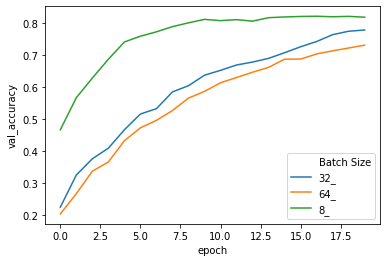

In [25]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

In [ ]:
exp.history

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [28]:
model = create_model(1)
large_lr = model.fit(X_train, y_train,
                       epochs=20,
                       batch_size=8,
                       validation_data=(X_test, y_test))

Epoch 1/20
10000/10000 [==============================] - 5s 516us/step - loss: 703.1440 - accuracy: 0.0994 - val_loss: 2.5573 - val_accuracy: 0.0997
Epoch 2/20
10000/10000 [==============================] - 5s 497us/step - loss: 2.5489 - accuracy: 0.0998 - val_loss: 2.4528 - val_accuracy: 0.0997
Epoch 3/20
10000/10000 [==============================] - 5s 497us/step - loss: 2.5461 - accuracy: 0.0997 - val_loss: 2.4794 - val_accuracy: 0.1018
Epoch 4/20
10000/10000 [==============================] - 5s 502us/step - loss: 2.5438 - accuracy: 0.1005 - val_loss: 2.4609 - val_accuracy: 0.1041
Epoch 5/20
10000/10000 [==============================] - 5s 500us/step - loss: 2.5480 - accuracy: 0.0976 - val_loss: 2.6760 - val_accuracy: 0.0984
Epoch 6/20
10000/10000 [==============================] - 5s 500us/step - loss: 2.5429 - accuracy: 0.0995 - val_loss: 2.4875 - val_accuracy: 0.1041
Epoch 7/20
10000/10000 [==============================] - 5s 503us/step - loss: 2.5428 - accuracy: 0.0987 - va

In [29]:
model = create_model(.1)
large_lrtwo = model.fit(X_train, y_train,
                       epochs=20,
                       batch_size=8,
                       validation_data=(X_test, y_test))

Epoch 1/20
10000/10000 [==============================] - 5s 519us/step - loss: 3.4973 - accuracy: 0.0984 - val_loss: 2.3237 - val_accuracy: 0.0983
Epoch 2/20
10000/10000 [==============================] - 5s 503us/step - loss: 2.3291 - accuracy: 0.0997 - val_loss: 2.3234 - val_accuracy: 0.1020
Epoch 3/20
10000/10000 [==============================] - 5s 506us/step - loss: 2.3292 - accuracy: 0.0989 - val_loss: 2.3391 - val_accuracy: 0.0993
Epoch 4/20
10000/10000 [==============================] - 5s 508us/step - loss: 2.3290 - accuracy: 0.0993 - val_loss: 2.3295 - val_accuracy: 0.0997
Epoch 5/20
10000/10000 [==============================] - 5s 507us/step - loss: 2.3285 - accuracy: 0.1003 - val_loss: 2.3223 - val_accuracy: 0.1020
Epoch 6/20
10000/10000 [==============================] - 5s 536us/step - loss: 2.3287 - accuracy: 0.0999 - val_loss: 2.3265 - val_accuracy: 0.0980
Epoch 7/20
10000/10000 [==============================] - 5s 508us/step - loss: 2.3282 - accuracy: 0.1007 - val_

In [30]:
model = create_model(.01)
std_lr = model.fit(X_train, y_train,
                       epochs=20,
                       batch_size=8,
                       validation_data=(X_test, y_test))

Epoch 1/20
10000/10000 [==============================] - 5s 505us/step - loss: 2.4894 - accuracy: 0.1031 - val_loss: 2.3049 - val_accuracy: 0.1041
Epoch 2/20
10000/10000 [==============================] - 5s 507us/step - loss: 2.3055 - accuracy: 0.0985 - val_loss: 2.3060 - val_accuracy: 0.0997
Epoch 3/20
10000/10000 [==============================] - 5s 490us/step - loss: 2.3051 - accuracy: 0.1007 - val_loss: 2.3054 - val_accuracy: 0.0997
Epoch 4/20
10000/10000 [==============================] - 5s 493us/step - loss: 2.3053 - accuracy: 0.0993 - val_loss: 2.3035 - val_accuracy: 0.0997
Epoch 5/20
10000/10000 [==============================] - 5s 492us/step - loss: 2.3052 - accuracy: 0.1013 - val_loss: 2.3033 - val_accuracy: 0.0984
Epoch 6/20
10000/10000 [==============================] - 5s 492us/step - loss: 2.3054 - accuracy: 0.0997 - val_loss: 2.3061 - val_accuracy: 0.0983
Epoch 7/20
10000/10000 [==============================] - 5s 486us/step - loss: 2.3051 - accuracy: 0.1000 - val_

In [31]:
model = create_model(.001)
small_lr = model.fit(X_train, y_train,
                       epochs=20,
                       batch_size=8,
                       validation_data=(X_test, y_test))

Epoch 1/20
10000/10000 [==============================] - 5s 513us/step - loss: 1.8513 - accuracy: 0.4067 - val_loss: 1.2523 - val_accuracy: 0.5601
Epoch 2/20
10000/10000 [==============================] - 5s 504us/step - loss: 0.9738 - accuracy: 0.7094 - val_loss: 0.8588 - val_accuracy: 0.7412
Epoch 3/20
10000/10000 [==============================] - 5s 506us/step - loss: 0.7859 - accuracy: 0.7751 - val_loss: 0.7839 - val_accuracy: 0.7695
Epoch 4/20
10000/10000 [==============================] - 5s 506us/step - loss: 0.7309 - accuracy: 0.7917 - val_loss: 0.8074 - val_accuracy: 0.7678
Epoch 5/20
10000/10000 [==============================] - 5s 506us/step - loss: 0.7002 - accuracy: 0.8026 - val_loss: 0.7615 - val_accuracy: 0.7857
Epoch 6/20
10000/10000 [==============================] - 5s 506us/step - loss: 0.6816 - accuracy: 0.8110 - val_loss: 0.7820 - val_accuracy: 0.7781
Epoch 7/20
10000/10000 [==============================] - 5s 507us/step - loss: 0.6626 - accuracy: 0.8152 - val_

In [32]:
model = create_model(.0001)
smallest_lr = model.fit(X_train, y_train,
                       epochs=20,
                       batch_size=8,
                       validation_data=(X_test, y_test))

Epoch 1/20
10000/10000 [==============================] - 5s 510us/step - loss: 3.4176 - accuracy: 0.3025 - val_loss: 1.6880 - val_accuracy: 0.3947
Epoch 2/20
10000/10000 [==============================] - 5s 524us/step - loss: 1.5660 - accuracy: 0.4432 - val_loss: 1.5115 - val_accuracy: 0.4561
Epoch 3/20
10000/10000 [==============================] - 5s 509us/step - loss: 1.3955 - accuracy: 0.4992 - val_loss: 1.3929 - val_accuracy: 0.4997
Epoch 4/20
10000/10000 [==============================] - 5s 511us/step - loss: 1.2728 - accuracy: 0.5389 - val_loss: 1.3061 - val_accuracy: 0.5437
Epoch 5/20
10000/10000 [==============================] - 5s 504us/step - loss: 1.1798 - accuracy: 0.5719 - val_loss: 1.2231 - val_accuracy: 0.5714
Epoch 6/20
10000/10000 [==============================] - 5s 510us/step - loss: 1.0954 - accuracy: 0.6060 - val_loss: 1.1778 - val_accuracy: 0.5975
Epoch 7/20
10000/10000 [==============================] - 5s 508us/step - loss: 1.0307 - accuracy: 0.6292 - val_

In [34]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([large_lr, std_lr, smallest_lr],
                       ["1_", ".01_", ".0001_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,703.143982,0.099375,2.557297,0.09975,0,1_
1,2.548851,0.099762,2.452840,0.09975,1,1_
2,2.546130,0.099738,2.479438,0.10180,2,1_
3,2.543819,0.100538,2.460860,0.10405,3,1_
4,2.547982,0.097637,2.675961,0.09835,4,1_


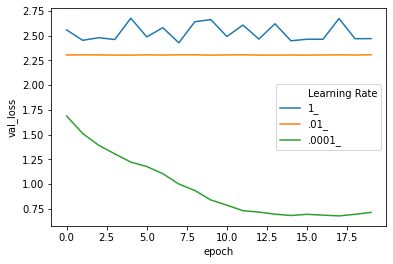

In [36]:
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df);

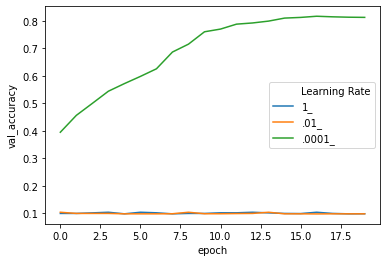

In [37]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [38]:
## 
sgd_nonest = create_model(.0001, SGD)
bt_default = sgd_nonest.fit(X_train, y_train,
                       epochs=15,
                       batch_size=8,
                       validation_data=(X_test, y_test))

Epoch 1/15
10000/10000 [==============================] - 5s 462us/step - loss: 2.4250 - accuracy: 0.3592 - val_loss: 1.6956 - val_accuracy: 0.4225
Epoch 2/15
10000/10000 [==============================] - 5s 460us/step - loss: 1.5992 - accuracy: 0.4498 - val_loss: 1.5771 - val_accuracy: 0.4688
Epoch 3/15
10000/10000 [==============================] - 5s 454us/step - loss: 1.4895 - accuracy: 0.4880 - val_loss: 1.4944 - val_accuracy: 0.4895
Epoch 4/15
10000/10000 [==============================] - 5s 455us/step - loss: 1.4030 - accuracy: 0.5414 - val_loss: 1.4208 - val_accuracy: 0.5561
Epoch 5/15
10000/10000 [==============================] - 5s 455us/step - loss: 1.3240 - accuracy: 0.5767 - val_loss: 1.3607 - val_accuracy: 0.5703
Epoch 6/15
10000/10000 [==============================] - 5s 451us/step - loss: 1.2613 - accuracy: 0.5975 - val_loss: 1.2970 - val_accuracy: 0.5959
Epoch 7/15
10000/10000 [==============================] - 5s 460us/step - loss: 1.2139 - accuracy: 0.6117 - val_

In [39]:
def create_model_nesterov(lr, optimizer =SGD):
  optim = optimizer(learning_rate=lr, nesterov=True)

  model = Sequential(
      [Dense(64, activation='relu', input_dim=784),
       Dense(32, activation='relu'),
       Dense(10, activation='softmax')]
  )

  model.compile(optimizer=optim, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])  
  return model



In [40]:
model = create_model_nesterov(.0001)
sgd_nest = model.fit(X_train, y_train,
                       epochs=15,
                       batch_size=8,
                       validation_data=(X_test, y_test))

Epoch 1/15
10000/10000 [==============================] - 5s 465us/step - loss: 2.5207 - accuracy: 0.1831 - val_loss: 1.9778 - val_accuracy: 0.2849
Epoch 2/15
10000/10000 [==============================] - 5s 452us/step - loss: 1.8293 - accuracy: 0.3550 - val_loss: 1.7932 - val_accuracy: 0.3733
Epoch 3/15
10000/10000 [==============================] - 5s 458us/step - loss: 1.6822 - accuracy: 0.4045 - val_loss: 1.6952 - val_accuracy: 0.4193
Epoch 4/15
10000/10000 [==============================] - 5s 453us/step - loss: 1.6018 - accuracy: 0.4307 - val_loss: 1.6324 - val_accuracy: 0.4392
Epoch 5/15
10000/10000 [==============================] - 5s 456us/step - loss: 1.5525 - accuracy: 0.4466 - val_loss: 1.5995 - val_accuracy: 0.4430
Epoch 6/15
10000/10000 [==============================] - 5s 456us/step - loss: 1.5143 - accuracy: 0.4584 - val_loss: 1.5639 - val_accuracy: 0.4550
Epoch 7/15
10000/10000 [==============================] - 5s 459us/step - loss: 1.4865 - accuracy: 0.4682 - val_

In [41]:
model = create_model(.0001)
adam_model = model.fit(X_train, y_train,
                       epochs=15,
                       batch_size=8,
                       validation_data=(X_test, y_test))

Epoch 1/15
10000/10000 [==============================] - 5s 508us/step - loss: 3.8187 - accuracy: 0.3331 - val_loss: 1.6839 - val_accuracy: 0.4294
Epoch 2/15
10000/10000 [==============================] - 5s 499us/step - loss: 1.5160 - accuracy: 0.4647 - val_loss: 1.4616 - val_accuracy: 0.4952
Epoch 3/15
10000/10000 [==============================] - 5s 502us/step - loss: 1.3393 - accuracy: 0.5189 - val_loss: 1.3462 - val_accuracy: 0.5350
Epoch 4/15
10000/10000 [==============================] - 5s 506us/step - loss: 1.2146 - accuracy: 0.5739 - val_loss: 1.2578 - val_accuracy: 0.5916
Epoch 5/15
10000/10000 [==============================] - 5s 501us/step - loss: 1.0935 - accuracy: 0.6292 - val_loss: 1.1609 - val_accuracy: 0.6479
Epoch 6/15
10000/10000 [==============================] - 5s 503us/step - loss: 0.9824 - accuracy: 0.6805 - val_loss: 1.0371 - val_accuracy: 0.6933
Epoch 7/15
10000/10000 [==============================] - 5s 503us/step - loss: 0.8766 - accuracy: 0.7226 - val_

In [42]:
from tensorflow.keras.optimizers import Nadam

model = create_model(.0001, Nadam)
nadam_model = model.fit(X_train, y_train,
                       epochs=15,
                       batch_size=8,
                       validation_data=(X_test, y_test))

Epoch 1/15
10000/10000 [==============================] - 6s 553us/step - loss: 4.1311 - accuracy: 0.3037 - val_loss: 1.7004 - val_accuracy: 0.3943
Epoch 2/15
10000/10000 [==============================] - 5s 546us/step - loss: 1.5466 - accuracy: 0.4563 - val_loss: 1.4738 - val_accuracy: 0.4735
Epoch 3/15
10000/10000 [==============================] - 5s 550us/step - loss: 1.3474 - accuracy: 0.5233 - val_loss: 1.3361 - val_accuracy: 0.5385
Epoch 4/15
10000/10000 [==============================] - 5s 547us/step - loss: 1.2015 - accuracy: 0.5716 - val_loss: 1.2474 - val_accuracy: 0.5809
Epoch 5/15
10000/10000 [==============================] - 6s 551us/step - loss: 1.1079 - accuracy: 0.6012 - val_loss: 1.1513 - val_accuracy: 0.6087
Epoch 6/15
10000/10000 [==============================] - 6s 551us/step - loss: 1.0192 - accuracy: 0.6386 - val_loss: 1.0997 - val_accuracy: 0.6374
Epoch 7/15
10000/10000 [==============================] - 5s 550us/step - loss: 0.9568 - accuracy: 0.6734 - val_

In [43]:
from tensorflow.keras.optimizers import Ftrl

model = create_model(.0001, Ftrl)
FTRL_model = model.fit(X_train, y_train,
                       epochs=15,
                       batch_size=8,
                       validation_data=(X_test, y_test))

Epoch 1/15
10000/10000 [==============================] - 6s 559us/step - loss: 22.2050 - accuracy: 0.1916 - val_loss: 14.4725 - val_accuracy: 0.2281
Epoch 2/15
10000/10000 [==============================] - 6s 552us/step - loss: 12.2295 - accuracy: 0.2384 - val_loss: 10.4573 - val_accuracy: 0.2468
Epoch 3/15
10000/10000 [==============================] - 6s 552us/step - loss: 9.2781 - accuracy: 0.2528 - val_loss: 8.2530 - val_accuracy: 0.2569
Epoch 4/15
10000/10000 [==============================] - 6s 561us/step - loss: 7.4488 - accuracy: 0.2591 - val_loss: 6.7265 - val_accuracy: 0.2609
Epoch 5/15
10000/10000 [==============================] - 6s 556us/step - loss: 6.1283 - accuracy: 0.2598 - val_loss: 5.5878 - val_accuracy: 0.2616
Epoch 6/15
10000/10000 [==============================] - 6s 555us/step - loss: 5.1296 - accuracy: 0.2571 - val_loss: 4.7097 - val_accuracy: 0.2555
Epoch 7/15
10000/10000 [==============================] - 6s 559us/step - loss: 4.3670 - accuracy: 0.2580 - 

In [44]:
batch_sizes = []

for exp, result in zip([nadam_model, adam_model, sgd_nest],
                       ["Nadam", "Adam", "SGD+Nest"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Optimizer'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Optimizer'] = df['Optimizer'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Optimizer
0,4.131117,0.303712,1.700401,0.39430,0,Nadam
1,1.546633,0.456300,1.473823,0.47355,1,Nadam
2,1.347446,0.523275,1.336146,0.53850,2,Nadam
3,1.201488,0.571588,1.247435,0.58090,3,Nadam
4,1.107887,0.601250,1.151325,0.60865,4,Nadam


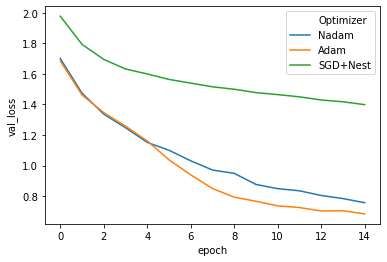

In [46]:
sns.lineplot(x='epoch', y='val_loss', hue='Optimizer', data=df);

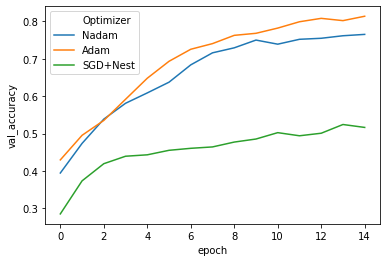

In [47]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Optimizer', data=df);

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Your answer goes here.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


